In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

### **Load Data**

In [49]:
data = pd.read_csv("creditcard_2023.csv")
data = shuffle(data, random_state=42)
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
437378,437378,0.420468,-0.070194,-0.569266,0.191673,-0.009607,0.426903,-0.356728,0.096143,0.077806,...,0.134969,0.070433,0.047770,-0.851622,0.102876,-0.375436,0.820807,0.665983,8633.18,1
504222,504222,-0.238944,0.250929,-0.374408,0.152938,-0.105008,-0.039028,-0.293004,0.133771,-0.591631,...,0.192405,0.289441,-0.255187,-0.817462,0.308284,1.582688,0.574425,0.478489,12299.55,1
4794,4794,-0.117796,-0.147961,2.130455,-0.325762,0.325616,0.271351,0.772625,-0.244342,1.240012,...,-0.271739,-0.404654,-0.121235,0.857659,0.541920,0.756534,-0.238177,-0.403038,5215.87,0
388411,388411,-0.855315,0.137014,-0.628116,0.613733,-0.643573,-0.664283,-0.880040,0.466586,-1.045508,...,0.405505,0.167560,0.446262,-0.205976,0.492582,0.658619,1.609128,-0.025592,19282.98,1
424512,424512,0.257686,0.035247,-0.203112,0.506745,-0.242235,-0.192608,-0.289297,0.044488,-0.396122,...,0.162191,0.165912,-0.181999,0.331451,1.043095,0.029799,0.643273,0.736723,19114.27,1


In [50]:
data = data.drop('id', axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
437378,0.420468,-0.070194,-0.569266,0.191673,-0.009607,0.426903,-0.356728,0.096143,0.077806,-0.673283,...,0.134969,0.070433,0.047770,-0.851622,0.102876,-0.375436,0.820807,0.665983,8633.18,1
504222,-0.238944,0.250929,-0.374408,0.152938,-0.105008,-0.039028,-0.293004,0.133771,-0.591631,-0.651518,...,0.192405,0.289441,-0.255187,-0.817462,0.308284,1.582688,0.574425,0.478489,12299.55,1
4794,-0.117796,-0.147961,2.130455,-0.325762,0.325616,0.271351,0.772625,-0.244342,1.240012,0.414358,...,-0.271739,-0.404654,-0.121235,0.857659,0.541920,0.756534,-0.238177,-0.403038,5215.87,0
388411,-0.855315,0.137014,-0.628116,0.613733,-0.643573,-0.664283,-0.880040,0.466586,-1.045508,-1.234377,...,0.405505,0.167560,0.446262,-0.205976,0.492582,0.658619,1.609128,-0.025592,19282.98,1
424512,0.257686,0.035247,-0.203112,0.506745,-0.242235,-0.192608,-0.289297,0.044488,-0.396122,-0.370119,...,0.162191,0.165912,-0.181999,0.331451,1.043095,0.029799,0.643273,0.736723,19114.27,1


In [51]:
null_values = data.isnull().sum()
null_values

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### **Statistics for Numerical Columns**

In [53]:
summary_stats = data.describe()
summary_stats

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,-2.836523e-17,-5.518099e-17,7.847297e-17,-2.839022e-17,4.998278e-19,1.736902e-17,2.054292e-17,1.399518e-17,2.991470e-17,1.513229e-16,...,1.088375e-17,-2.124268e-19,7.210016e-18,-1.339539e-17,-3.321356e-17,-3.248881e-19,-1.971821e-17,3.202647e-17,12041.957635,0.5
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,-3.163276e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,-5.901008e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,2.626145e-01,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,5.924603e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,3.172271e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568630 entries, 437378 to 121958
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      568630 non-null  float64
 1   V2      568630 non-null  float64
 2   V3      568630 non-null  float64
 3   V4      568630 non-null  float64
 4   V5      568630 non-null  float64
 5   V6      568630 non-null  float64
 6   V7      568630 non-null  float64
 7   V8      568630 non-null  float64
 8   V9      568630 non-null  float64
 9   V10     568630 non-null  float64
 10  V11     568630 non-null  float64
 11  V12     568630 non-null  float64
 12  V13     568630 non-null  float64
 13  V14     568630 non-null  float64
 14  V15     568630 non-null  float64
 15  V16     568630 non-null  float64
 16  V17     568630 non-null  float64
 17  V18     568630 non-null  float64
 18  V19     568630 non-null  float64
 19  V20     568630 non-null  float64
 20  V21     568630 non-null  float64
 21  V22     56

In [57]:
data['Class'].unique()

array([1, 0], dtype=int64)

In [59]:
counts = data['Class'].value_counts()
counts

Class
1    284315
0    284315
Name: count, dtype: int64

### **Plot Class Distribution**

<Axes: xlabel='Class', ylabel='count'>

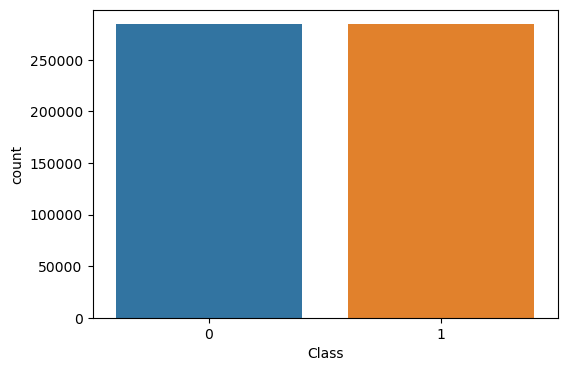

In [61]:
plt.figure(figsize=(6,4))
sns.countplot(x=data['Class'])

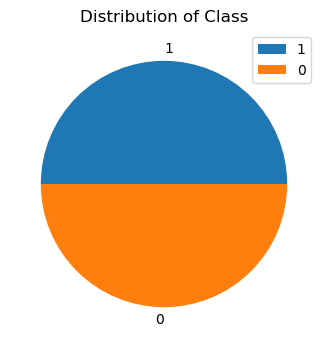

In [63]:
plt.figure(figsize=(6,4))
class_counts = data['Class'].value_counts()
plt.pie(class_counts, labels=class_counts.index)
plt.title('Distribution of Class')
plt.legend()
plt.show()

### **Correlation Heatmap**

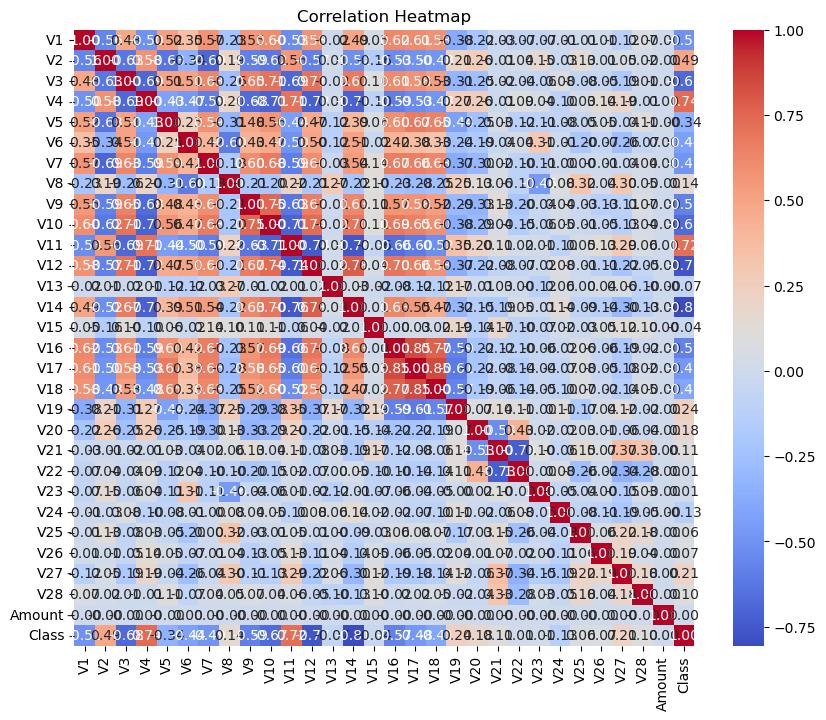

In [65]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()